                                               Sales Prediction Linear Regression Model

### Prediction or Interpretation
- This model will be focussed on Prediction rather Interpretaion
- Model will have more explanation over the model prediction performance using performance metrics


In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# will import regression models later while building it

In [2]:
# importing csv fie and creating dataframe

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Dataset Description and attributes summary

In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


- This dataset has three feature with different mode of advertising - TV, Radio, Newspaper
- We are gonna findout the best contributor to achieve maximum sales
- All columns has numerical values of float datatype.

- TV - Holds high share in advertising campaign followed by Newspaper and Radio
- Its pretty clear visual ads attract more customers compared to Radio

### Data Cleaning

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

This dataset is pretty clean. Since our concern is on the model performance we dive into the next section.

### Feature Selection

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
np.round(df.corr(),2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


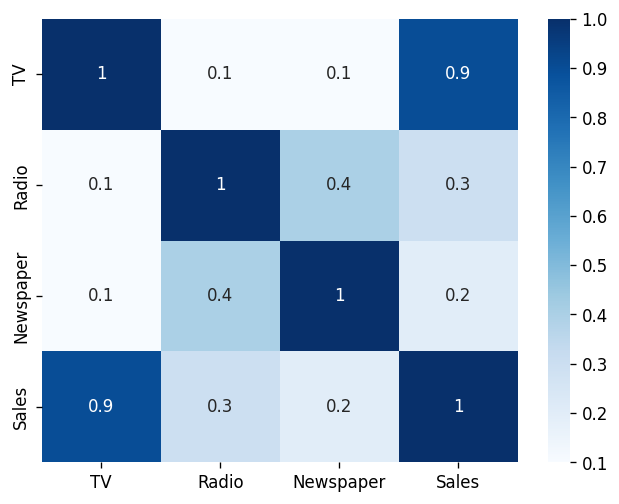

In [9]:
plt.figure(dpi=120)
sns.heatmap(np.round(df.corr(),1),annot=True, cmap="Blues")
plt.show()

As mentioned before TV advertising has maximum correlation with sales.

Determining Normality

<AxesSubplot:>

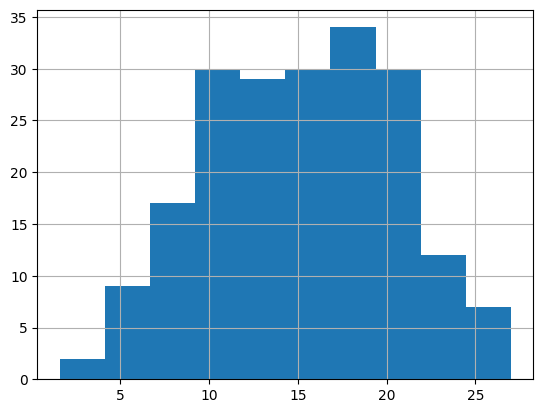

In [10]:
df['Sales'].hist()

In [11]:
from scipy.stats.mstats import normaltest
normaltest(df['Sales'].values)

NormaltestResult(statistic=7.100749912891184, pvalue=0.0287138711844335)

Since p-value is less than 0.05 we can conclude the distribution is Normal. Even though we will try the transformation to compare the pvalues

Log Transformation

<AxesSubplot:>

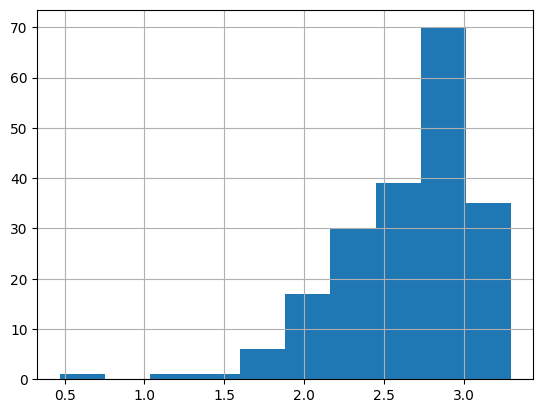

In [12]:
np.log(df.Sales).hist()

Clearly shows the distribution is left skewed. so no good after transformation.

In [13]:
normaltest(np.log(df['Sales']).values)

NormaltestResult(statistic=58.29670316124151, pvalue=2.1929652606684847e-13)

Nope Nope Nope all Bad... we have made it worse so lets keep the original format for rest of the model build

In [14]:
y = df.Sales
x = df.drop(columns = ['Sales'])

Polynomial feature creation

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x_pf = pf.fit_transform(x)

Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=10, train_size=0.8)
xtrain_pf, xtest_pf, ytrain_pf, ytest_pf = train_test_split(x_pf, y, random_state=10, train_size=0.8)

### Linear Model Build

### Stock Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)
lrypred = lrmodel.predict(xtest)

In [18]:
# score for non polynomial feature
print('Stock LR Non-Polynomial Score :', lrmodel.score(xtest, ytest))
print('Mean Absolute Error :', mae(ytest, lrypred))
print('Mean Squared Error :', mse(ytest, lrypred))
print('Root Mean Squared Error :', np.sqrt(mse(ytest, lrypred)))
print('R2 Score :', r2(ytest,lrypred))

Stock LR Non-Polynomial Score : 0.8886717577059424
Mean Absolute Error : 1.5748043429197127
Mean Squared Error : 4.448475475432899
Root Mean Squared Error : 2.10914093304191
R2 Score : 0.8886717577059424


In [19]:
# score for polynomial feature
lrmodel.fit(xtrain_pf, ytrain_pf)
lrypred = lrmodel.predict(xtest_pf)
print(' Stock LR Polynomial Score :', lrmodel.score(xtest_pf, ytest_pf))
print('Mean Absolute Error :', mae(ytest, lrypred))
print('Mean Squared Error :', mse(ytest, lrypred))
print('Root Mean Squared Error :', np.sqrt(mse(ytest, lrypred)))
print('R2 Score :', r2(ytest,lrypred))

 Stock LR Polynomial Score : 0.9389652287353996
Mean Absolute Error : 1.089077274110421
Mean Squared Error : 2.4388392156778353
Root Mean Squared Error : 1.5616783329731623
R2 Score : 0.9389652287353996


Dataset with polynomial feature performs well in stock linear regression model

### Lasso Regression

In [20]:
from sklearn.linear_model import LassoCV
lassomodel = LassoCV()
lassomodel.fit(xtrain, ytrain)
lassoypred = lassomodel.predict(xtest)

In [21]:
# score for non polynomial feature
print('Lasso LR Non-Polynomial Score :', lassomodel.score(xtest, ytest))
print('Mean Absolute Error :', mae(ytest, lassoypred))
print('Mean Squared Error :', mse(ytest, lassoypred))
print('Root Mean Squared Error :', np.sqrt(mse(ytest, lassoypred)))
print('R2 Score :', r2(ytest,lassoypred))

Lasso LR Non-Polynomial Score : 0.8888142958595117
Mean Absolute Error : 1.5856164924556566
Mean Squared Error : 4.442779908275812
Root Mean Squared Error : 2.107790290393191
R2 Score : 0.8888142958595117


In [22]:
# score for polynomial feature
lassomodel.fit(xtrain_pf, ytrain_pf)
lassoypred = lrmodel.predict(xtest_pf)
print('Lasso LR Non-Polynomial Score :', lassomodel.score(xtest_pf, ytest_pf))
print('Mean Absolute Error :', mae(ytest_pf, lassoypred))
print('Mean Squared Error :', mse(ytest_pf, lassoypred))
print('Root Mean Squared Error :', np.sqrt(mse(ytest_pf, lassoypred)))
print('R2 Score :', r2(ytest_pf,lassoypred))

Lasso LR Non-Polynomial Score : 0.8706431811737638
Mean Absolute Error : 1.089077274110421
Mean Squared Error : 2.4388392156778353
Root Mean Squared Error : 1.5616783329731623
R2 Score : 0.9389652287353996


Here also polynomial feature dataset performs well in Lasso Linear Regression model

### Ridge Regression

In [23]:
from sklearn.linear_model import RidgeCV
ridgemodel = RidgeCV()
ridgemodel.fit(xtrain, ytrain)
ypred = ridgemodel.predict(xtest)

In [24]:
# score for non polynomial feature
print('Ridge LR Non-Polynomial Score :', ridgemodel.score(xtest, ytest))
print('Mean Absolute Error :', mae(ytest, ypred))
print('Mean Squared Error :', mse(ytest, ypred))
print('Root Mean Squared Error :', np.sqrt(mse(ytest, ypred)))
print('R2 Score :', r2(ytest,ypred))

Ridge LR Non-Polynomial Score : 0.8886742389546507
Mean Absolute Error : 1.5748689868770613
Mean Squared Error : 4.448376329216271
Root Mean Squared Error : 2.1091174289774077
R2 Score : 0.8886742389546507


In [25]:
ridgemodel.fit(xtrain_pf, ytrain_pf)
ypred = ridgemodel.predict(xtest_pf)
print('Ridge LR Non-Polynomial Score :', ridgemodel.score(xtest_pf, ytest_pf))
print('Mean Absolute Error :', mae(ytest_pf, ypred))
print('Mean Squared Error :', mse(ytest_pf, ypred))
print('Root Mean Squared Error :', np.sqrt(mse(ytest_pf, ypred)))
print('R2 Score :', r2(ytest_pf,ypred))

Ridge LR Non-Polynomial Score : 0.9389616502427018
Mean Absolute Error : 1.0890465429473049
Mean Squared Error : 2.438982205782387
Root Mean Squared Error : 1.5617241132102644
R2 Score : 0.9389616502427018


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Same here, polynomial feature wins

### Best Model

Stock LR
- Stock LR Polynomial Score : 0.9389652287353996
- Mean Absolute Error : 1.089077274110421
- Mean Squared Error : 2.4388392156778353
- Root Mean Squared Error : 1.5616783329731623
- R2 Score : 0.9389652287353996

Lasso LR
- Lasso LR Non-Polynomial Score : 0.8706431811737638
- Mean Absolute Error : 1.089077274110421
- Mean Squared Error : 2.4388392156778353
- Root Mean Squared Error : 1.5616783329731623
- R2 Score : 0.9389652287353996

Ridge LR
- Ridge LR Non-Polynomial Score : 0.9389616502427018
- Mean Absolute Error : 1.0890465429473049
- Mean Squared Error : 2.438982205782387
- Root Mean Squared Error : 1.5617241132102644
- R2 Score : 0.9389616502427018

For my dataset both Stock and Ridge performs well

### Insights on my models

- According to my dataset all three models have similar mae, mse and r2 values
- Only the prediction score varies for same test data

### Next Step Analysis

- Since the dataset is so simple we can achive good performance with slight tunning.
- Going forward will try this techniques in larger complex dataset and record the performance




-------------------------------------------------------------- Thank you by Shankesh Raju MS----------------------------------------------------------------------